___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # resimlerigenelde matplotlib ile görsellestiriyoruz..
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

In [6]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

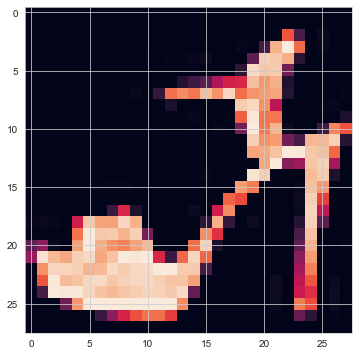

In [7]:
plt.imshow(X_train[9])
# plt.matshow(X_train[9])

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_train[9]

5

In [ ]:
# 5, sandalet demek..

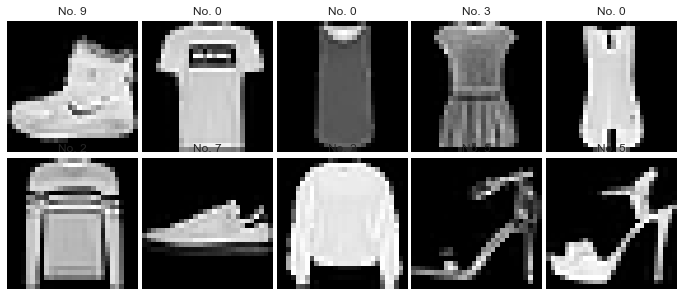

In [10]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [ ]:
# Hepsinden esit sayida ve 6000er adet mevcut.

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [13]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
y_train[0]

9

In [15]:
classes[y_train[0]]

'Ankle boot'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))

27347

In [17]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

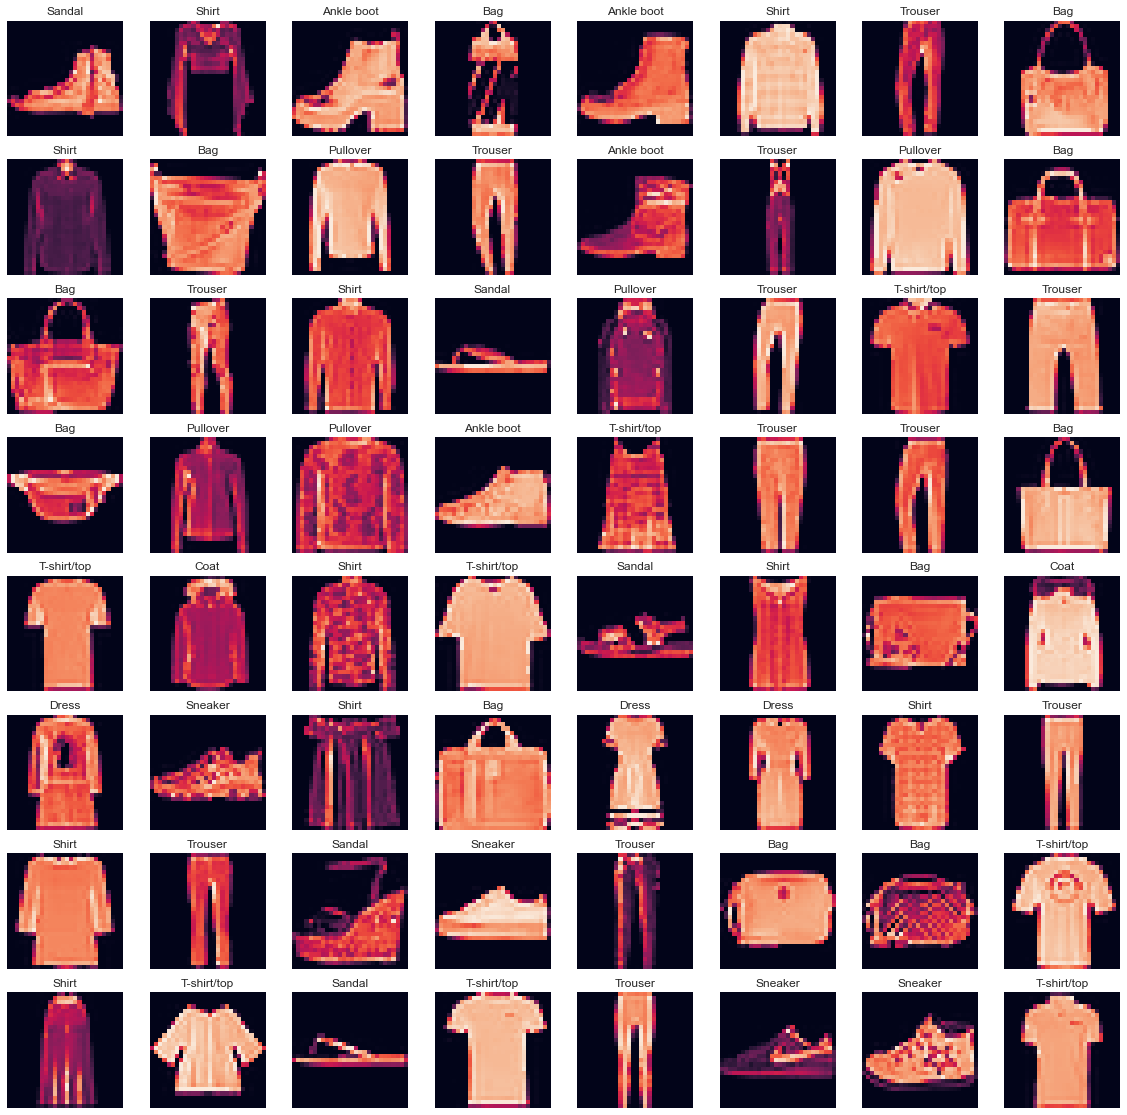

In [18]:
plt.figure(figsize=(20, 20)) # cözünürlük düsük..
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

In [ ]:
# cözünürlük baya düsük..

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
X_train[60].min()

0

In [20]:
X_train[60].max()

255

In [21]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
X_train[60].min()

0.0

In [23]:
X_train[60].max()

1.0

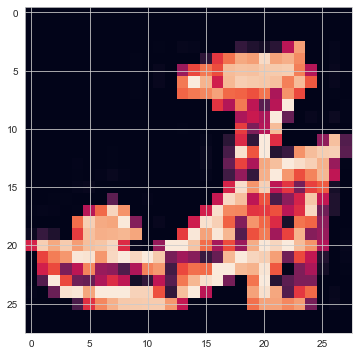

In [24]:
plt.imshow(X_train[60])

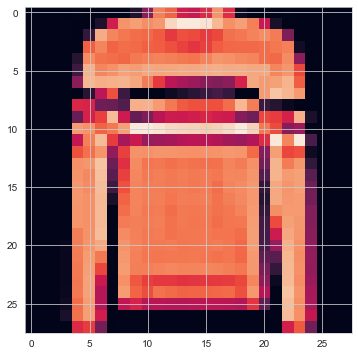

In [25]:
plt.imshow(X_train[5])

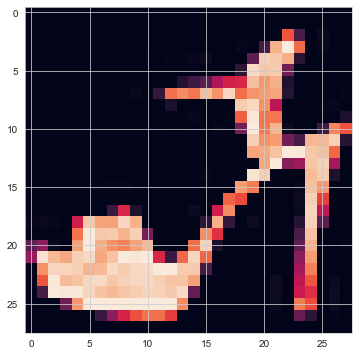

In [26]:
plt.imshow(X_train[9])

In [27]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
X_train.reshape(60000, 28, 28, 1).shape # 1=kanal sayisi Eger 3 olsa idi, RGB olurdu..

(60000, 28, 28, 1)

In [29]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [30]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
y_train.shape

(60000,)

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [35]:
y_train[9]

5

In [36]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
# SAnirim yukarida yaptigimiz sey..

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
# Bunu da yukaridaki to_cathegorize kodu ile yaptigimizi düsünüyorum..

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
#imajin üstünden 32 kez filtre geciyor.
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid (default)

model.add(Flatten())

model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [43]:
model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 28s 14ms/step - loss: 0.4383 - accuracy: 0.8435 - val_loss: 0.3330 - val_accuracy: 0.8832
Epoch 2/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2821 - accuracy: 0.8997 - val_loss: 0.3047 - val_accuracy: 0.8911
Epoch 3/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2432 - accuracy: 0.9143 - val_loss: 0.2845 - val_accuracy: 0.8987
Epoch 4/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2204 - accuracy: 0.9228 - val_loss: 0.3095 - val_accuracy: 0.9054
Epoch 5/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2058 - accuracy: 0.9277 - val_loss: 0.2871 - val_accuracy: 0.9073


In [44]:
model.metrics_names

['loss', 'accuracy']

In [46]:
summary = pd.DataFrame(model.history.history)
summary.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.438,0.843,0.333,0.883
1,0.282,0.900,0.305,0.891
2,0.243,0.914,0.285,0.899
3,0.220,0.923,0.309,0.905
4,0.206,0.928,0.287,0.907


In [ ]:
# Güzel bir accuracy oktasindan basladi, yoksa patience=4 filan secmek daha uygun olabilirdi..

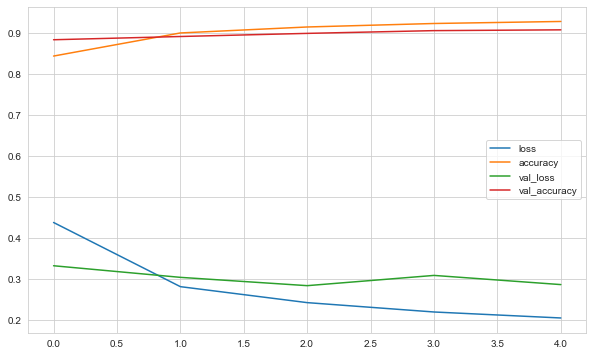

In [47]:
summary.plot();

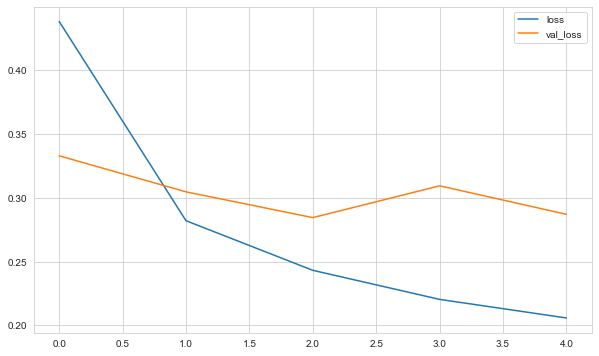

In [48]:
summary[["loss", "val_loss"]].plot();

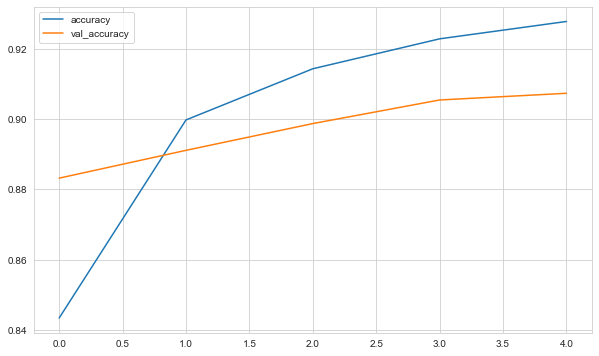

In [49]:
summary[["accuracy", "val_accuracy"]].plot();

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
#Yukarida yaptik sanirim..

**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
# Bunu da yukarida yaptik..

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [50]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [51]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2845 - accuracy: 0.8987


[0.2845153212547302, 0.8986999988555908]

In [52]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2845153212547302
Test accuracy: 0.8986999988555908


## Prediction

In [53]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 4ms/step


array([[4.0889070e-05, 5.3566901e-10, 5.2502724e-08, ..., 8.5310442e-03,
        5.1578204e-06, 9.8825431e-01],
       [1.0894583e-04, 1.8287702e-12, 9.9986339e-01, ..., 2.3712948e-12,
        2.2214094e-08, 5.3564229e-14],
       [4.5165689e-09, 1.0000000e+00, 7.2036925e-12, ..., 4.2983412e-11,
        5.8468524e-15, 1.6750746e-15],
       ...,
       [2.7417002e-04, 1.3043407e-11, 4.1633220e-06, ..., 1.8731707e-05,
        9.9949098e-01, 9.0290825e-08],
       [1.1189597e-08, 9.9999964e-01, 5.8385817e-11, ..., 1.8614721e-12,
        5.0982185e-14, 1.1359473e-13],
       [4.6142312e-03, 3.6439349e-04, 1.1335398e-02, ..., 6.9437630e-02,
        3.7885629e-02, 2.3097651e-02]], dtype=float32)

In [54]:
pred_prob.shape

(10000, 10)

In [55]:
pred_prob[0]

array([4.0889070e-05, 5.3566901e-10, 5.2502724e-08, 1.0001040e-07,
       6.7972441e-09, 2.7988388e-03, 3.6958273e-04, 8.5310442e-03,
       5.1578204e-06, 9.8825431e-01], dtype=float32)

In [56]:
np.argmax(pred_prob[0])

9

In [57]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [58]:
y_pred.shape

(10000,)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.79      0.89      0.84      1000
           3       0.91      0.91      0.91      1000
           4       0.87      0.81      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.81      0.61      0.70      1000
           7       0.94      0.97      0.95      1000
           8       0.99      0.96      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [60]:
print(confusion_matrix(y_test, y_pred))

[[931   0  24   8   4   1  29   0   3   0]
 [  2 977   2  14   2   0   3   0   0   0]
 [ 22   2 891   9  41   0  35   0   0   0]
 [ 32   6   9 914  24   0  14   0   1   0]
 [  2   0 100  33 813   0  52   0   0   0]
 [  0   0   0   0   0 971   0  19   0  10]
 [213   1  96  28  48   0 614   0   0   0]
 [  0   0   0   0   0   7   0 971   1  21]
 [  7   1   6   3   5   2  14   4 958   0]
 [  0   0   0   0   0   8   1  44   0 947]]


In [61]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [62]:
(y_test != y_pred).sum()

1013

In [ ]:
#az degil..

In [65]:
my_picture = X_test[60]

In [66]:
my_picture.shape

(28, 28, 1)

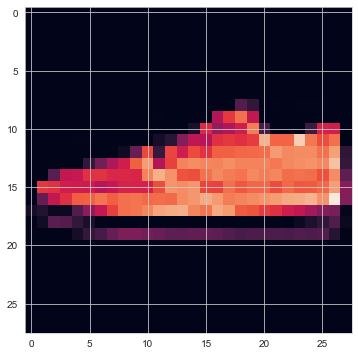

In [67]:
plt.imshow(my_picture.reshape(28,28));

In [68]:
pred_prob = model.predict(my_picture.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 22ms/step


array([[3.7168156e-05, 3.0647620e-08, 7.6396766e-08, 4.9986988e-07,
        5.1023594e-08, 3.2712455e-04, 1.7913027e-05, 9.9425805e-01,
        1.7006974e-05, 5.3420695e-03]], dtype=float32)

In [69]:
y_pred = np.argmax(pred_prob)
y_pred

7

In [70]:
model.save("alex_assignment-2.h5")

In [71]:
model=tf.keras.models.load_model('alex_assignment-2.h5')

In [72]:
pred=model.predict(np.expand_dims(X_test[5],axis=0)) # böyle de geri cagiriyoruz..

1/1 [==============================] - 0s 64ms/step


In [73]:
np.argmax(pred)

1

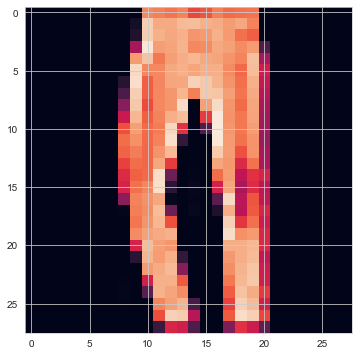

In [74]:
plt.imshow(X_test[5].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___